### Chapter 6: Regression
This notebook is about how regression analysis can help to understand the data behavior, how to predict data values (continuous or discrete), and to find important predictors (sparse models). It will present four different regression models: 
1. Simple Linear Regression,
2. Multiple Linear Regression,
3. Polynomial Regression, and
4. Logistic regression.

The analysis results will be represented qualitatively by means of Seaborn visualization tools and quantitatively by means Scikit-learn library which provides validation measures and other toolboxes. We use present three practical cases using real data:

1. Sea Ice Extent and Climate Change
2. Prediction of the Price of a New Housing Data Market
3. Winning or Losing Football Team

In [2]:
# import visualization libraries 
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', rc={'lines.linewidth':2})

import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

import numpy as np

__Simple and Multiple Linear Regression__

The simplest model is the __linear model__, where the response $y$ depends linearly from on the covariates $x_i$.

In the simple linear regression, with a single input variable, we describe the relationship between the predictor and response with a straight line. The model is:

$y = a_0 + a_1 x_1$

The parameter $a_0$ is called the constant term or the _intercept_.

In case of multiple linear regression, we extend this idea by fitting a m-dimensional hyperplane to our $m$ predictors.

$y = a_1 x_1 + ... + a_m x_m$

The $a_i$ are termed the _parameters_ of the model or the _coefficients_.

Example: Does the insurance price depend on the driving experience? Given the following information, the montly auto insurance prices ($y$) and the driving experience in year ($x$) of set of $n$ drivers, we can build a linear model to answer this question. We can also predict the montly auto insurance price for a driver with 10 years of driving experience.

Let's generate a set of data to illustrate simple linear regression.

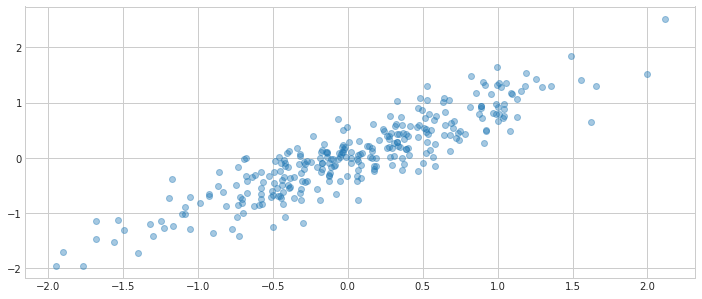

In [2]:
X1= np.random.randn(300,2) # random points sampled from a univariate 'normal' distribution
A= np.array([[0.6,0.4], [0.4,0.6]])
X2= np.dot(X1, A)
plt.plot(X2[:,0], X2[:,1], 'o', alpha=0.4);

We can create a linear model to explain the data.

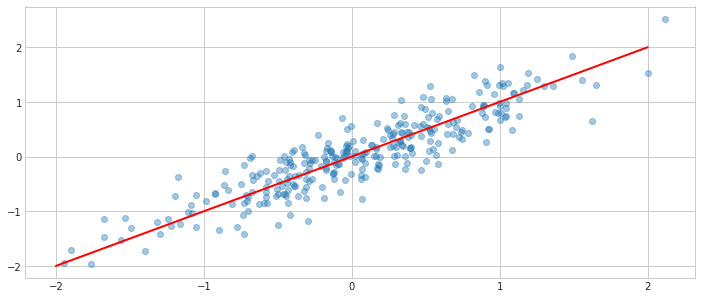

In [3]:
model= [0+1*x for x in np.arange(-2,3)]
plt.plot(X2[:,0], X2[:,1], 'o', alpha=0.4)
plt.plot(np.arange(-2,3), model, 'r')
plt.show();

But there are other linear models. Which is the best model for a set of samples?

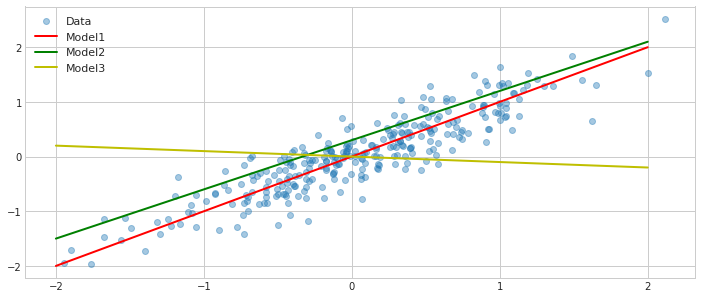

In [4]:
plt.plot(X2[:,0], X2[:,1], 'o', alpha=0.4)
model1= [0+1*x for x in np.arange(-2,3)]
model2= [0.3+0.9*x for x in np.arange(-2,3)]
model3= [0-0.1*x for x in np.arange(-2,3)]
plt.plot(np.arange(-2,3), model1, 'r')
plt.plot(np.arange(-2,3), model2, 'g')
plt.plot(np.arange(-2,3), model3, 'y')
plt.legend(('Data','Model1','Model2','Model3'));

__Ordinary Least Squares__

Ordinary Least Squares (OLS) is the simplest and most common __estimator__ in which the coefficients $a$'s of the simple linear regression: $y = a_o + a_1 x_1$ are chosen to minimize the __square distance between the predicted values and the actual values.__

Given the set of samples ($x, y$), the objective is to minize:

$||a_o+a_1x-y||^2_2 = \sum_{j=1}^n (a_o+a_1x_j-y_j)^2$

with respect to $a_0$, $a_1$.

This expression is often called __sum of squared errors of prediction (SSE).__

__Practical Case 1: Climate Change and Sea Ice Extent__

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow and Ice Data Center](https://nsidc.org/). The dataset has the following columns:

| Column Name | Meaning |
|-------------|---------|
| year | 4 digit year |
| mo | 1 or 2 digit month |
| data_type | input data set (Goddard/NRTSI-G) |
| region | hemisphere  (N: Northern, S: Southern) |
| extent | sea ice extent in millions of square kilometers |
| area | sea ice area in millions of square kilometers |

In [ ]:
!wget -O SeaIce.txt https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch06/SeaIce.txt
print('Download complete!')

In [5]:
# load the dataset into pandas dataframe
import pandas as pd
ice= pd.read_csv('SeaIce.txt', delim_whitespace=True)
print('Dimesions:', ice.shape)
ice.head(6)

Dimesions: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92
5,1984,1,Goddard,N,14.61,11.60


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

In [6]:
ice.mean()

year      1996.000000
mo           6.500000
extent     -35.443066
area       -37.921108
dtype: float64

_A negative mean?!_

We need to clean the data. Can we find the outliers visually?

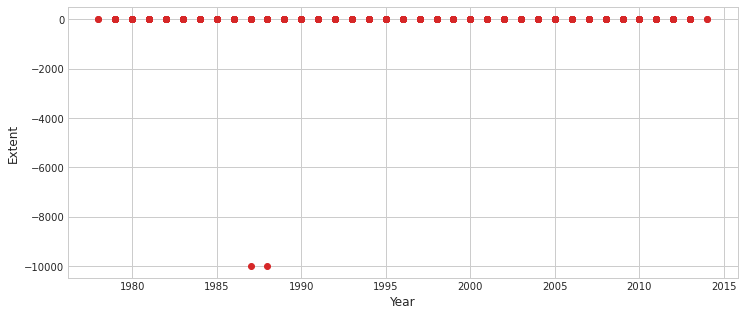

In [7]:
x= ice.year
y= ice.extent
plt.scatter(x,y, color='tab:red')
plt.xlabel('Year')
plt.ylabel('Extent');

In [8]:
print('Different values in data_type fieled:', np.unique(ice.data_type.values))

Different values in data_type fieled: ['-9999' 'Goddard' 'NRTSI-G']


Why is there a third data type called -9999? Let's find all observations under this data type.

In [9]:
print(ice[(ice.data_type != 'Goddard') & (ice.data_type != 'NRTSI-G')])

     year  mo data_type region  extent    area
9    1988   1     -9999      N -9999.0 -9999.0
397  1987  12     -9999      N -9999.0 -9999.0


Dimensions: (422, 6)


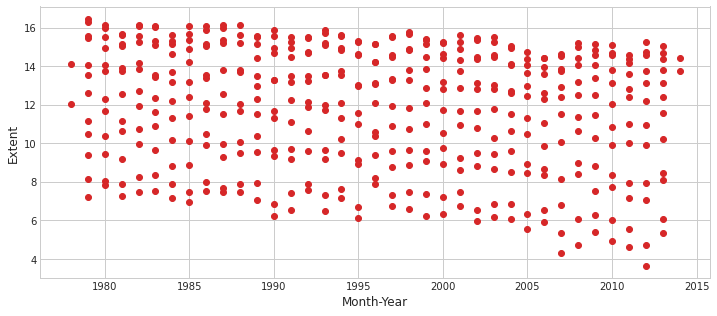

In [10]:
# clean the dataset
ice2= ice[ice.data_type != '-9999']
print('Dimensions:', ice2.shape)
x= ice2.year
y= ice2.extent
plt.scatter(x,y, color='tab:red')
plt.xlabel('Month-Year')
plt.ylabel('Extent');

To compute the tendency for a given interval of time (e.g. month), we need to normalize the data.

The `seaborn.lmplot()` function is intended for exploring linear relationships of different forms of multidimensional datasets.Input data must be in a Pandas `DataFrame`. To plot them, we provide the name of columns as predictor and response variable. 

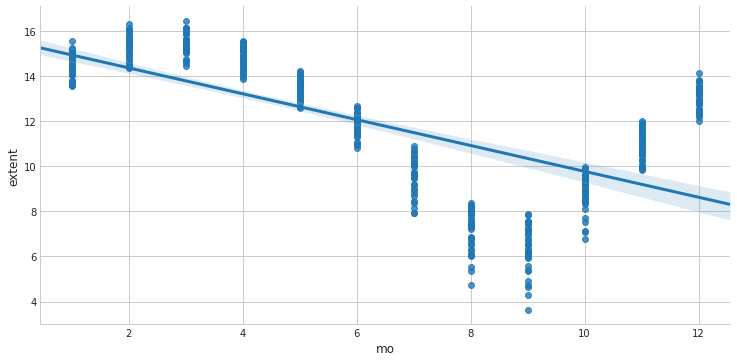

In [11]:
sns.lmplot('mo','extent', ice2, height=5.2, aspect=2);

Let's compute the mean, variance, and standard deviation for each month.

In [12]:
grouped= ice2.groupby('mo')
month_means= grouped.extent.mean()
month_variance= grouped.extent.var()
month_std= grouped.extent.std()
print(month_means)
print(month_variance)
print(month_std)

mo
1     14.479429
2     15.298889
3     15.491714
4     14.766000
5     13.396000
6     11.860000
7      9.601143
8      7.122286
9      6.404857
10     8.809143
11    10.964722
12    13.059429
Name: extent, dtype: float64
mo
1     0.304906
2     0.295804
3     0.237209
4     0.215378
5     0.189901
6     0.247918
7     0.679175
8     0.824577
9     1.143902
10    0.630361
11    0.412511
12    0.284870
Name: extent, dtype: float64
mo
1     0.552183
2     0.543879
3     0.487041
4     0.464088
5     0.435777
6     0.497913
7     0.824121
8     0.908062
9     1.069534
10    0.793953
11    0.642270
12    0.533732
Name: extent, dtype: float64


We can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend) and we subtract it from the mean extend for that interval. This value must be converted to percent difference by dividing it by the 1981-2010 average and then multiplying by 100. 

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

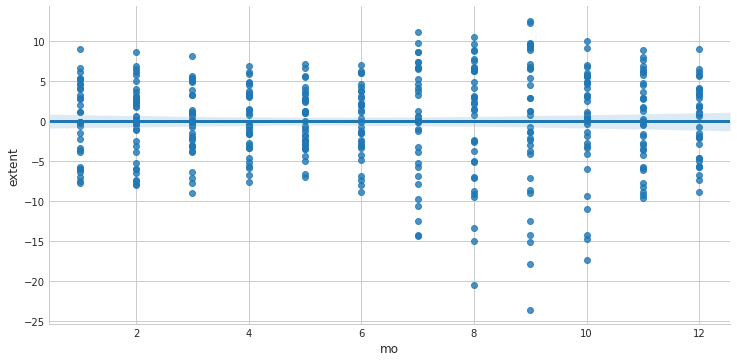

In [13]:
for i in range(12):
    ice2.extent[ice2.mo == i+1] = 100*(ice2.extent[ice2.mo == i+1] - month_means[i+1])/month_means.mean()
    
sns.lmplot('mo', 'extent', ice2, height=5.2, aspect=2);

In [14]:
print('mean: %.4f'% ice2.extent.mean())
print('var: %.4f'% ice2.extent.var())
print('std: %.4f'% ice2.extent.std())

mean: -0.0000
var: 31.9832
std: 5.6554


These values can beplotted for the entire series or for particular months.
Let's consider the entirety.

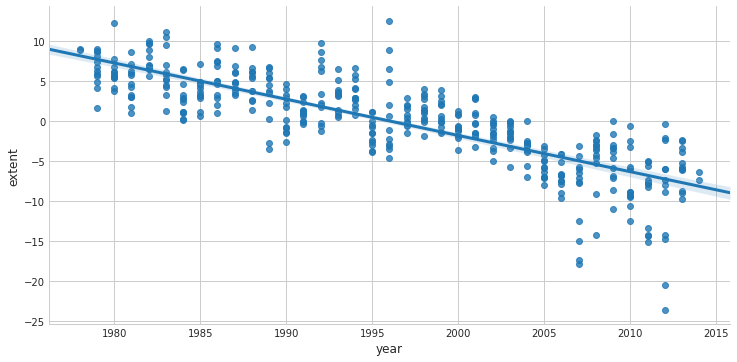

In [15]:
sns.lmplot('year','extent',ice2,height=5.2,aspect=2);

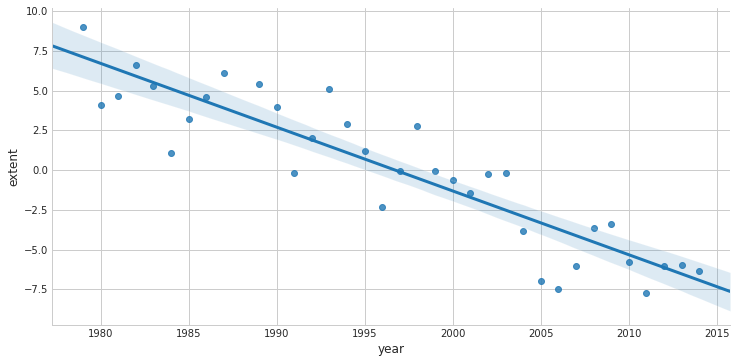

In [16]:
#for January
jan = ice2[ice2.mo == 1]
sns.lmplot('year','extent',jan,height=5.2,aspect=2);

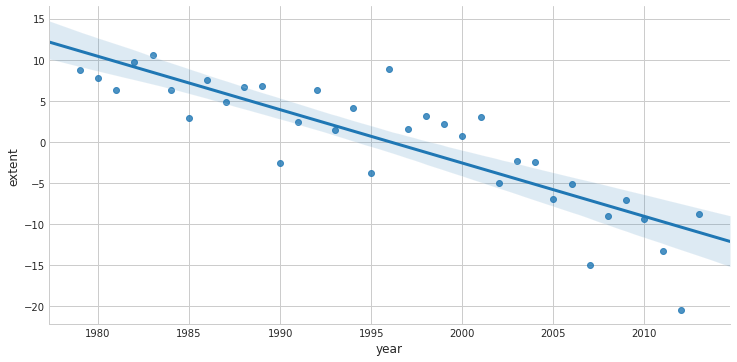

In [17]:
#for August
aug = ice2[ice2.mo == 8]
sns.lmplot('year','extent',aug,height=5.2,aspect=2);

For year and extent, calculate a Pearson correlation coefficient and the p-value for testing non-correlation.

In [18]:
import scipy.stats
cor= scipy.stats.pearsonr(ice2.year.values, ice2.extent.values)
r= np.round(cor[0], 6)
p= np.round(cor[1], 6)
print('Pearson Correlation & p-value of Year and Extent:',r,p)
cor

Pearson Correlation & p-value of Year and Extent: -0.81835 0.0


(-0.8183500709897177, 4.4492318168708476e-103)

We can also compute the trend as simple linear regression (OLS) and quantitatively evaluate it.

For that we can use the __Scikit-Learn__ library that provides a variety of both supervised and unsupervised machine learning techniques. Scikit-learn provides an object-oriented interface centered around the concept of an Estimator. The `Estimator.fit()` method sets the state of the estimator based on the training data. Usually, the data is comprised of a two-dimensional numpy array $x$ of shape (`n_samples`, `n_predictors`) that holds the so-called feature matrix and a one-dimensional numpy array $y$ that holds the responses. Some estimators allow the user to control the fitting behavior. For example, the `sklearn.linear_model.LinearRegression` estimator allows the user to specify whether or not to fit an intercept term. This is done by setting the corresponding constructor arguments of the estimator object. During the fitting process, the state of the estimator is stored in instance attributes that have a trailing underscore ('\_'). For example, the coefficients of a LinearRegression estimator are stored in the attribute coef\_.

Estimators tgat can generate predictions provide a `Estimator.predict()` method. In case of regression, `Estimator.predict()` will return the predicted regression values $\hat{y}$.

In [19]:
from sklearn.linear_model import LinearRegression
est= LinearRegression(fit_intercept=True)

x= ice2[['year']]
y= ice2[['extent']]
est.fit(x,y)

print('Intercept:', est.intercept_)
print('Coefficients:', est.coef_)

Intercept: [903.71640207]
Coefficients: [[-0.45275459]]


We can evaluate the model fitting by computing the mean squared error ($MSE$) and the coefficient of determination ($R^2$) of the model. 

The coefficient $R^2$ is defined as $1 - \frac{u}{v}$, where $u$ is the residual sum of squares $\sum (y - \hat{y})^2$ and $v$ is the regression sum of squares $\sum (y - \bar{y})^2$, where $\bar{y}$ is the mean. The best possible score for $R^2$ is 1.0; lower values are worse. These measures can provide a quantitative answer to the question we are facing: Is there a negative trend in the evolution of sea ice extent over recent years?

MSE: 10.5391
R^2: 0.6697
Std: 5.6554


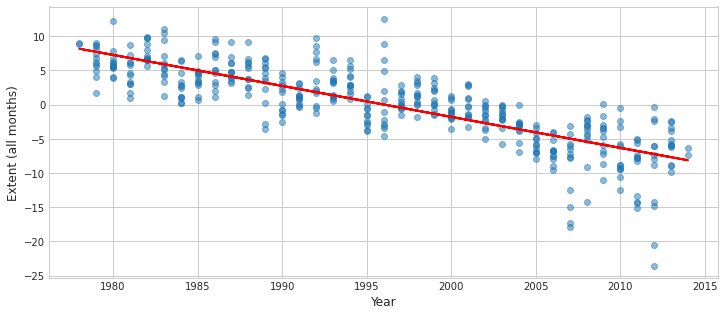

In [20]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

x= ice2[['year']]
y= ice2[['extent']]
model= LinearRegression()
model.fit(x,y)
y_hat= model.predict(x)

plt.plot(x,y,'o', alpha=.5)
plt.plot(x,y_hat,'r')
plt.xlabel('Year')
plt.ylabel('Extent (all months)');

print('MSE: %.4f'% MSE(y, y_hat))
print('R^2: %.4f'% r2_score(y, y_hat))
print('Std: %.4f'% y.std())

We can conclude that the data show a long-term negative trend years.

MSE: 3.8395
R^2: 0.8204


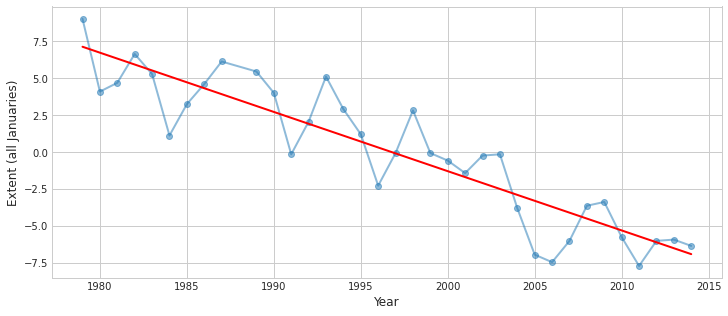

In [23]:
x= jan[['year']]
y= jan[['extent']]

model= LinearRegression()
model.fit(x,y)
y_hat= model.predict(x)

plt.plot(x, y,'-o', alpha = 0.5)
plt.plot(x, y_hat, 'r')
plt.xlabel('Year')
plt.ylabel('Extent (all Januaries)');

print('MSE: %.4f'% MSE(y, y_hat))
print('R^2: %.4f'% r2_score(y, y_hat))

We can also estimate the extent value for 2025. For that we use the function of the model.

In [38]:
X= [[2025]]
y_hat= model.predict(X)
j=1
# normalize
y_hat= (y_hat*month_means.mean()/100)+month_means[j]
print('Prediction of extent for January 2025 (in millions of square kilometers)', y_hat)

Prediction of extent for January 2025 (in millions of square kilometers) [[13.14449923]]


__Polynomial Regression__

Despite its name, linear regression can be used to fit non-linear. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors. 

A very popular non-linear regression technique is _Polynomial Regression_, which is in fact a special case of linear regression, sometimes referred to as _curvi-linear_. It is technique that models the relationship between the response and the predictors as a n-th order polynomial.

$y = a_1 \phi (x_1) + ... + a_m \phi (x_m)$

The higher the order of the polynomial, the _wigglier_ the function you can fit.

Using higher order polynomials comes at a price though: _computational complexity_ and _overfitting_. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalizw from the seen to predict the unseen.

__Practical Case 3: Boston Housing Data__

The Boston Housing dataset provides records of measurements of 13 attributes of housing markets around Boston, as well as median prices. We want to predict the price of a market given a set of attributes.

Let's start by importing the dataset from Scikit-Learn and visualizing different aspects.

In [3]:
from sklearn import datasets
boston= datasets.load_boston()
x_boston, y_boston = boston.data, boston.target
print('Dimensions:', x_boston.shape, y_boston.shape)

Dimensions: (506, 13) (506,)


In [4]:
print('Keys:', boston.keys())
print('Feature Names:', boston.feature_names)
print(boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

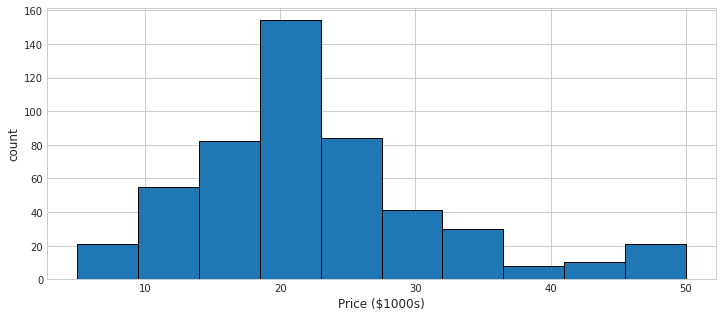

In [5]:
# histogram of prices
plt.hist(y_boston, edgecolor='black')
plt.xlabel('Price ($1000s)')
plt.ylabel('count');

Turning a Scikit-Learn dataset into a Pandas DataFrame is relatively easy.

In [7]:
import pandas as pd
df_boston= pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['PRICE']= boston.target
df_boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


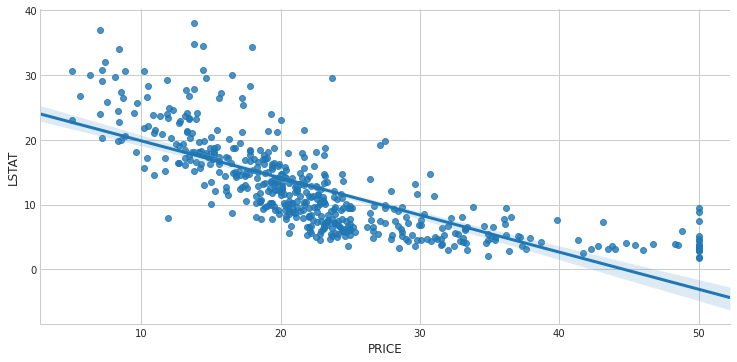

In [8]:
# visualize relationship between price and LSTAT
sns.lmplot('PRICE','LSTAT',df_boston,height=5.2,aspect=2);

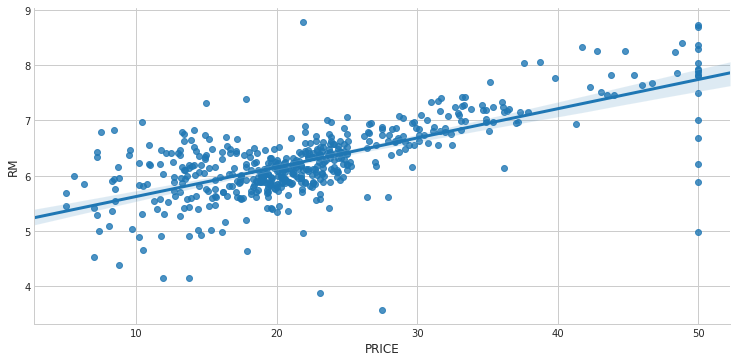

In [9]:
# visualize relationship between price and RM
sns.lmplot('PRICE','RM',df_boston,height=5.2,aspect=2);

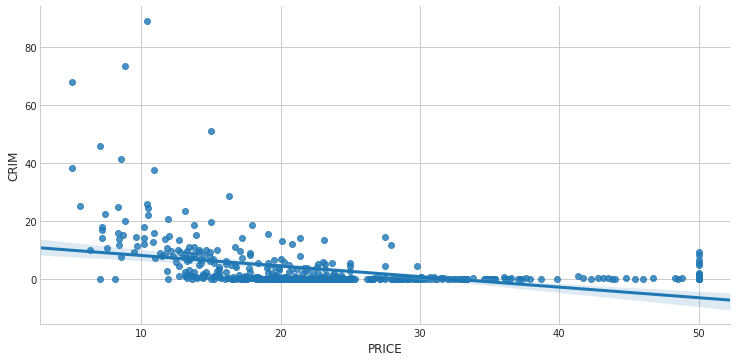

In [10]:
# visualize relationship between price and CRIM
sns.lmplot('PRICE','CRIM',df_boston,height=5.2,aspect=2);

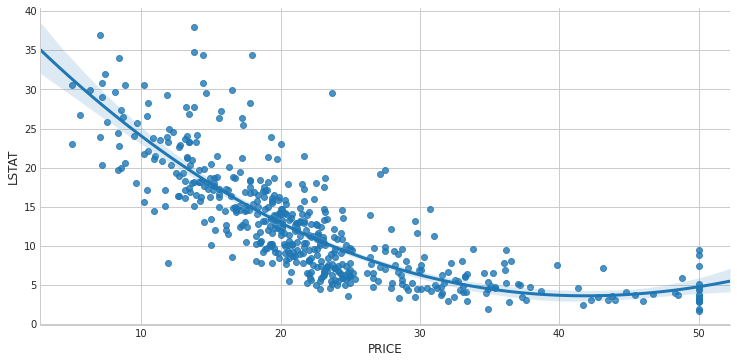

In [11]:
# visualize relationship between price and LSTAT, order=3
sns.lmplot('PRICE','LSTAT',df_boston,order=3,height=5.2,aspect=2);

__Heatmap__

We can also use the `seaborn.heatmap()` function to create a colored correlation matrix. 

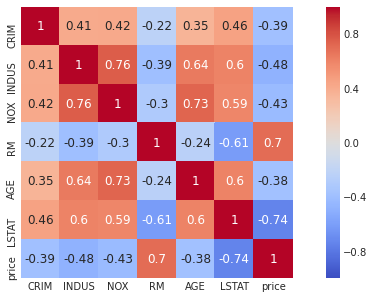

In [12]:
indexes= [0,2,4,5,6,12] # selected variables
df2= pd.DataFrame(boston.data[:,indexes], columns=boston.feature_names[indexes])
df2['price']=boston.target
corrmat= df2.corr()

sns.heatmap(corrmat, vmax=1, vmin=-1, annot=True, square=True, cmap='coolwarm');

Using the correlation matrix heatmap, we can observe that 'RM' and 'LSTAT' are the variables more significantly correlated with price.

__Scatter Matrix__

Let's explore multiple variables with scatter plots. The `scatter_matrix()` of Pandas is a grid of plots of multiple variable one against another, showing the relationship or each to the others. When the variable is plotted against itself, its distribution is shown in a histogram.

Let's consider 2 out of 13 variables: LSTAT, AGE, RM: 

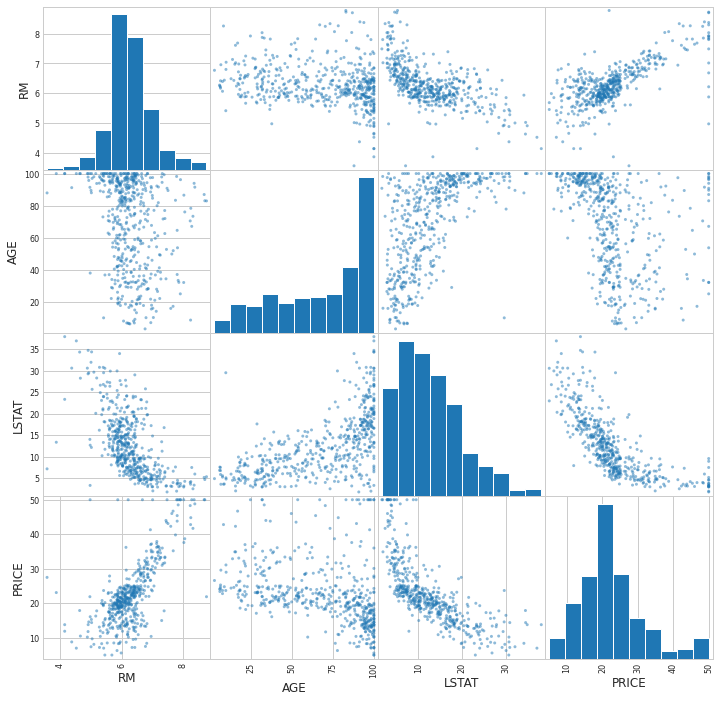

In [15]:
indexes= [5,6,12]
df2= pd.DataFrame(boston.data[:, indexes], columns= boston.feature_names[indexes])
df2['PRICE']= boston.target
pd.plotting.scatter_matrix(df2, figsize=(12,12));

__Predictions__

Let's make predictions. For evaluation purposes, we will split the data into a training set and test set.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x_boston, y_boston, test_size=0.5, shuffle=False)
print('Training & testing set dimensions:', x_train.shape, x_test.shape)

reg_boston= LinearRegression()
reg_boston.fit(x_train, y_train)
print('Intercept and Coefficients:', reg_boston.intercept_, reg_boston.coef_)

print('Training R^2:', r2_score(y_train, reg_boston.predict(x_train)))
print('Testing R^2:', r2_score(y_test, reg_boston.predict(x_test)))
print('Training MSE:', MSE(y_train, reg_boston.predict(x_train)))
print('Testing MSE:', MSE(y_test, reg_boston.predict(x_test)))

Training & testing set dimensions: (253, 13) (253, 13)
Intercept and Coefficients: -10.017430582945021 [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104]
Training R^2: 0.8557827200735684
Testing R^2: -2.2527343423925306
Training MSE: 9.987517325463743
Testing MSE: 303.43686292658987


We can see that all the coefficients obtained are different from zero, but which ones are significant. Also, the R^2 for the testing set is negative, which indcates overfitting on the training set. Therefore, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.

__Sparse Models__

Often, in real problems, there are uninformative variables in the data which prevent proper modelling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard the non-informative ones. This can be achieved by sparse methods, which use a penalization approach, such as _LASSO (least absolute shrinkage and selection operator)_ to set some model coefficients to zero (thereby discarding variables). Sparsity can be seen as application of Occam's razor: prefer simpler models to complex ones.   

In [18]:
from sklearn.linear_model import Lasso
reg_lasso= Lasso(alpha=0.3) # alpha must be between 0-1, where 0 is equivalent to an ordinary least square, solved by the LinearRegression object 
reg_lasso.fit(x_train, y_train)

print('Intercept and Coefficients:', reg_lasso.intercept_, reg_lasso.coef_)
print('Training R^2:', reg_lasso.score(x_train, y_train))
print('Testing R^2:', reg_lasso.score(x_test, y_test))
print('Training MSE:', MSE(y_train, reg_lasso.predict(x_train)))
print('Testing MSE:', MSE(y_test, reg_lasso.predict(x_test)))

Intercept and Coefficients: -6.183241836148397 [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817]
Training R^2: 0.8449992039829642
Testing R^2: 0.501127529021216
Training MSE: 10.73431100954422
Testing MSE: 46.538168094875665


It can now be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the testing score increasing from -2.25 to 0.5. This demonstrates that 4 of the initial variables are not important for the prediction and in fact they confuse the regressor.

In [19]:
# let's list the features again and find the informative ones
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
ind= np.argsort(np.abs(reg_lasso.coef_))
print('Order of features (from less to more import):', boston.feature_names[ind])

Order of features (from less to more import): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


We can also select the most important features with Sklearn in another way:

In [24]:
import sklearn.feature_selection as fs
selector= fs.SelectKBest(score_func= fs.f_regression, k=5) # k is number of features of informative features
selector.fit_transform(x_train, y_train)
print('Selected Features:', boston.feature_names[selector.get_support(indices=True)])

Selected Features: ['INDUS' 'RM' 'AGE' 'PTRATIO' 'LSTAT']


The set of selected features is now different, since the criterion has changed. However, the three important features that remain the same: 'RM', 'PTRATIO' and 'LSTAT'.

Let's evaluate the predictions.

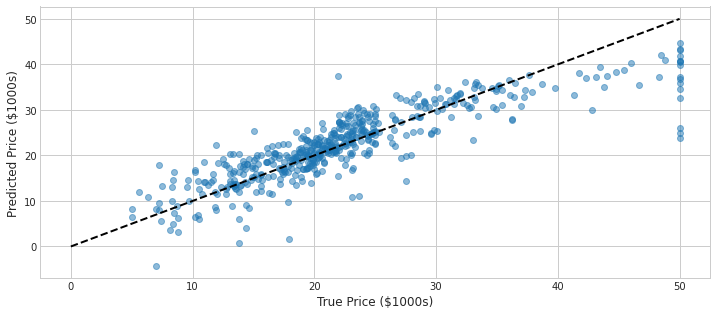

In [25]:
clf= LinearRegression()
clf.fit(boston.data, boston.target)
predicted= clf.predict(boston.data)
# visualize target vs predicted values
plt.scatter(boston.target, predicted, alpha=0.5)
plt.plot([0,50],[0,50], '--k')
plt.axis('tight')
plt.xlabel('True Price ($1000s)')
plt.ylabel('Predicted Price ($1000s)');

The model seems to be a good fitting expect for the most expensive houses.

Model evaluation:

In [26]:
clf.score(boston.data, boston.target)

0.7406426641094095

In [28]:
# single feature scoring
reg_feat1= LinearRegression()
for i in np.arange(13):
    feat1= x_train[:,i:i+1]
    reg_feat1.fit(feat1, y_train)
    print('Feature:', boston.feature_names[i])
    print('R^2 Score:', reg_feat1.score(feat1, y_train))

Feature: CRIM
R^2 Score: 0.05024843836202264
Feature: ZN
R^2 Score: 0.10206594240694722
Feature: INDUS
R^2 Score: 0.13068434569181497
Feature: CHAS
R^2 Score: 0.00018610373661331892
Feature: NOX
R^2 Score: 0.11130139266941119
Feature: RM
R^2 Score: 0.7699004053318655
Feature: AGE
R^2 Score: 0.11300215206715913
Feature: DIS
R^2 Score: 0.018087821597697507
Feature: RAD
R^2 Score: 0.0015003535946076507
Feature: TAX
R^2 Score: 0.05512205417475469
Feature: PTRATIO
R^2 Score: 0.13721073435814335
Feature: B
R^2 Score: 0.0463878641534512
Feature: LSTAT
R^2 Score: 0.5035503901281464


__Transformer__

Remember taht sometimes Standardization is useful.

There is a special type of `Estimator` called `Transformer` which tranforms the input data, e.g. selects a subset of the features or extracts new features based on the the original ones. One transformer that we will use here is `sklearn.preprocessing.StandardScaler`. This transformer centers each predictor in $x$ to have a zero mean and unit variance.

In [34]:
print('Before transformation:')
print('max:', np.max(y_train))
print('min:', np.min(y_train))
print('mean:', np.mean(y_train))

from sklearn.preprocessing import StandardScaler
scalerX= StandardScaler().fit(x_train)
y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)
scalerY= StandardScaler().fit(y_train)

x_train= scalerX.transform(x_train)
y_train= scalerY.transform(y_train)
x_test= scalerX.transform(x_test)
y_test= scalerY.transform(y_test)

print('After transformation:')
print('max:', np.max(y_train))
print('min:', np.min(y_train))
print('mean:', np.mean(y_train))

Before transformation:
max: 50.0
min: 11.8
mean: 24.307509881422927
After transformation:
max: 3.0873514853387736
min: -1.5029714532177498
mean: -2.808469311304744e-16


__Statistical Evaluation__

The `statsmodel` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response using the `OLS` class and ts initialization `OLS(y, x)` method. This method takes as an input two array-like objects $x$ and $y$. In general, $x$ will either  be a Numpy array or a Pandas DataFrame with shape ($n, p$) where $n$ is the number of datapoints (i.e. instances), and $p$ is the number of predictors. $y$ is either a one-dimensional Numpy array or a Pandas series of length $n$.  

In [39]:
!pip install statsmodels

     |████████████████████████████████| 9.5MB 7.2MB/s eta 0:00:01     |███▉                            | 1.1MB 7.2MB/s eta 0:00:02     |██████                          | 1.8MB 7.2MB/s eta 0:00:02     |████████████████████████████▊   | 8.5MB 7.2MB/s eta 0:00:01
     |████████████████████████████████| 235kB 29.9MB/s eta 0:00:01


In [41]:
import statsmodels.api as sm
X2= x_boston[:,12] # using column 12 'LSTAT' to perform regression
X12= sm.add_constant(X2) # adds a constant term to predictor
est= sm.OLS(y_boston, X2) # creates an object OLS estimator
est= est.fit()
est.summary() # prints summary like any statistical software

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    2.71e-67
Time:                        10:34:53   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Logistic Regression (Scikit-Learn)__

Logistic Regression or logit regression is a type of probabilistc statistical classification model. It is used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e. class label) based on one or more predictor variables (features).

The logistic function:

$f(x) = \frac{1}{1+ e - \lambda x}$

The logistic function is useful because it can take an input with any value from negative infinitely to positive infinity, whereas the output is confined to values between 0-1 and hence is interpretable as a probability. 

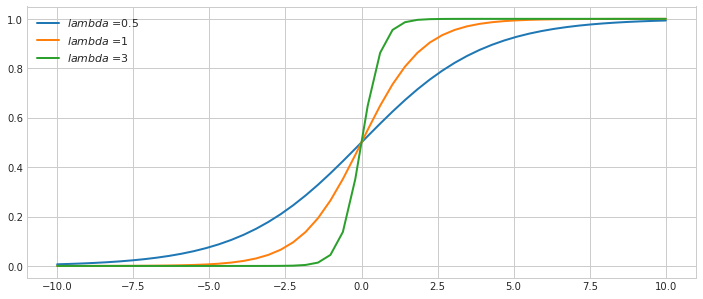

In [42]:
def logist(x,l):
    import numpy as np
    return 1/(1+np.exp(-l*x))

x= np.linspace(-10,10,50) # 50 points equally spaced between -10 & 10
t= logist(x, 0.5)
y= logist(x, 1)
z= logist(x, 3)
plt.plot(x,t, label='$lambda$ =0.5')
plt.plot(x,y, label='$lambda$ =1')
plt.plot(x,z, label='$lambda$ =3')
plt.legend(loc='upper left');

In [43]:
def lr_model(x):
    import numpy as np
    return 1/(1+np.exp(-x))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


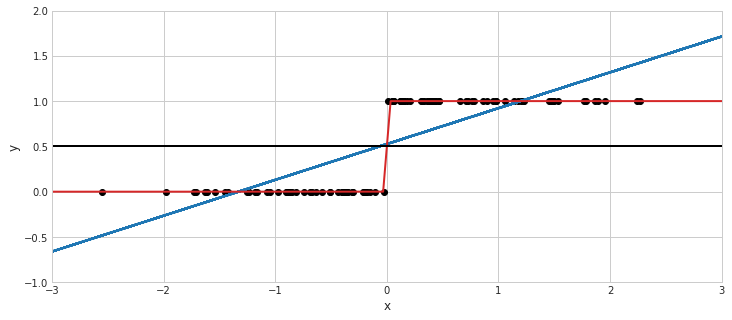

In [44]:
xmin, xmax= -10, 10
np.random.seed(0)
X= np.random.normal(size=100)

y= (X > 0).astype(np.float)
X= X[:, np.newaxis]

#linear regression
ols= LinearRegression()
ols.fit(X,y)
plt.plot(x_test, (ols.coef_ * x_test + ols.intercept_), color='tab:blue', linewidth=2, label='Linear Regression')

#logistic regression
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(C=1e5)
clf.fit(X,y)

X_test= np.linspace(-10,10,300)
loss= lr_model(X_test * clf.coef_ * clf.intercept_).ravel()
plt.plot(X_test, loss, color='tab:red', linewidth=2, label='Logistic Regression')

plt.axhline(0.5, color='black')
plt.scatter(X,y, color='black', label='Data Points')
plt.legend(loc='lower right')
plt.ylabel('y')
plt.xlabel('x')
plt.ylim(-1,2)
plt.xlim(-3,3);

__Practical Case 3: Winning or Losing Football Team__

We want to predict victory or defeat in a football match when we are given the number of goals a team scores. To do this we consider the set of results of the football matches from the Spanish League and we build a classification model. Follow these steps:

* Read the file into a Pandas DataFrame.
* Select columns: 'HomeTeam','AwayTeam','FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
* Visualize a scatter plot of FTHG versus FTAG.
* Built a $x$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
* Compute and visualize a logistic regression.
* What is the cut value?

In [45]:
!wget -O SP1.csv https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch06/SP1.csv
print('Download complete!')

--2020-10-27 11:31:27--  https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch06/SP1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.124.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.124.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104965 (103K) [text/plain]
Saving to: ‘SP1.csv’

SP1.csv             100%[===================>] 102.50K  --.-KB/s    in 0.02s   

2020-10-27 11:31:27 (5.10 MB/s) - ‘SP1.csv’ saved [104965/104965]

Download complete!


In [46]:
import pandas as pd
data_football= pd.read_csv('SP1.csv') #season 2012/13
s= data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]
s.head() # H=Home Win, D=Draw, A=Away Win

,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Celta,Malaga,0,1,A
1,Mallorca,Espanol,2,1,H
2,Sevilla,Getafe,2,1,H
3,Ath Bilbao,Betis,3,5,A
4,Barcelona,Sociedad,5,1,H


Can we predict if we have a win or loss if we are given a score?

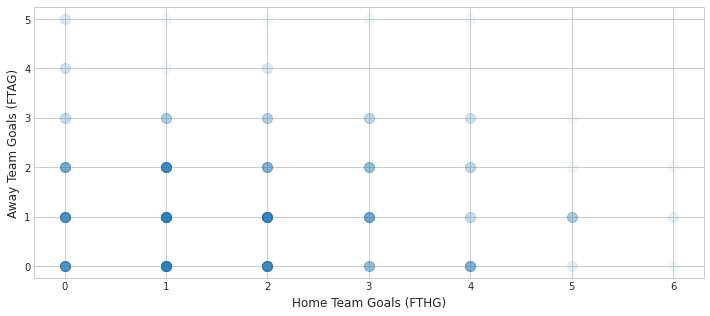

In [47]:
plt.scatter(s.FTHG, s.FTAG, s=100, alpha=0.05) # s=size of points
plt.xlabel('Home Team Goals (FTHG)')
plt.ylabel('Away Team Goals (FTAG)');

Create two extrac columns containing 'W' the number of goals of the winner team and 'L' the number of goals of the loser team.

In [48]:
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

s['W']= s.apply(my_f1, axis=1)
s['L']= s.apply(my_f2, axis=1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
s.info()
s.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
 4   FTR       380 non-null    object
 5   W         380 non-null    int64 
 6   L         380 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 20.9+ KB


,HomeTeam,AwayTeam,FTHG,FTAG,FTR,W,L
0,Celta,Malaga,0,1,A,1,0
1,Mallorca,Espanol,2,1,H,2,1
2,Sevilla,Getafe,2,1,H,2,1
3,Ath Bilbao,Betis,3,5,A,5,3
4,Barcelona,Sociedad,5,1,H,5,1


In [50]:
# create a feature set and target
x1= s['W'].values
y1= np.ones(len(x1), dtype=np.int)
x2= s['L'].values
y2= np.zeros(len(x2), dtype=np.int)

x= np.concatenate([x1, x2])
x= x[:, np.newaxis]
y= np.concatenate([y1, y2])

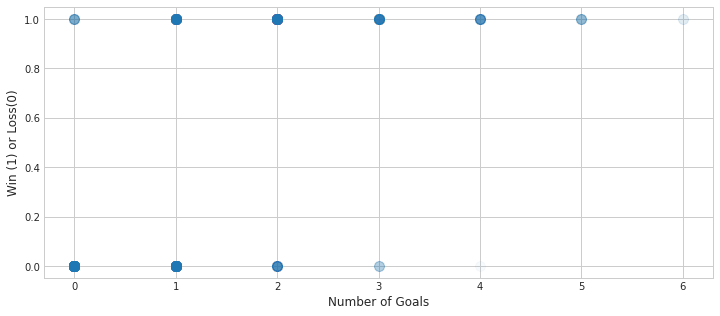

In [51]:
# plot the data
plt.scatter(x,y, s=100, alpha=0.03)
plt.xlabel('Number of Goals')
plt.ylabel('Win (1) or Loss(0)');

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


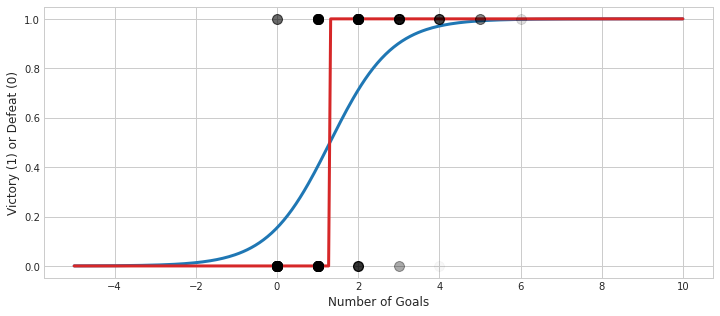

In [52]:
# build and visualize the Logistic Regression Classification model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)

X_test= np.linspace(-5,10,300)
loss= lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2= X_test[:, np.newaxis]
losspred= logreg.predict(X_test2)

plt.scatter(x.ravel(),y, color='black', s=100, zorder=20, alpha=0.03)
plt.plot(X_test, loss, color='tab:blue', linewidth=3)
plt.plot(X_test, losspred, color='tab:red', linewidth=3)
plt.xlabel('Number of Goals')
plt.ylabel('Victory (1) or Defeat (0)');

In [53]:
print(logreg.intercept_, logreg.coef_)

[-1.69931569] [[1.30313236]]


The figure above shows a scatter plot with transparency so we can appreciate the overlapping
in the discrete positions of the total numbers of victories and defeats. It
also shows the fitting of the logistic regression model, in blue, and prediction of the
logistic regression model, in red, for the Spanish football league results. With this information we can estimate that the cut off value is roughly 1 (actual 1.3031). This means that a team has to score more than one goal to win.

__Source:__

Igual, Laura, and Santi Seguí. "Chapter 6: Regression Analysis." In Introduction to Data Science, pp. 97-114. Springer, 2017.

Link to the [original notebook](https://github.com/DataScienceUB/introduction-datascience-python-book/blob/master/ch06_Regression_Analysis.ipynb).